In [15]:
import numpy as np
from scripts import physics, dataset, metrics
from isotree import IsolationForest

In [16]:
x_train, x_test = dataset.create_xtrain_xtest()
BB = dataset.load_dataset('BSM_preprocessed.h5', 'ttHto2B')

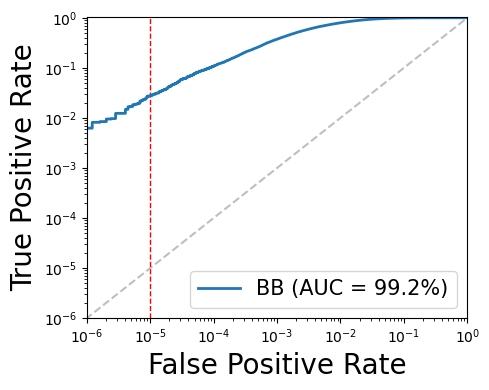

In [17]:
model = IsolationForest(ndim=1,ntrees=100, scoring_metric="depth").fit(x_train) # this is scoring_metric = "depth"
score = model.predict(x_test, output="score")
score_bsm = model.predict(BB, output='score')
fpr, tpr, auc = metrics.get_roc_auc(score_0=score, score_1=score_bsm) 
metrics.plot_roc(fpr, tpr, auc)

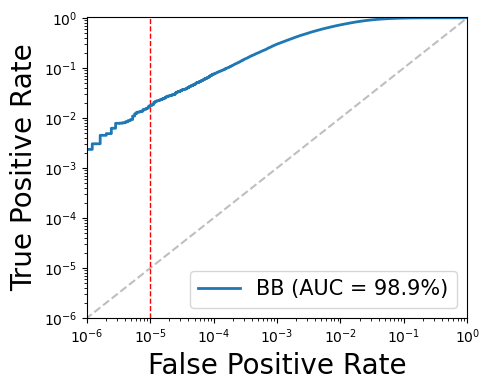

In [18]:
model2 = IsolationForest(ndim=1,ntrees=100, scoring_metric="density").fit(x_train) 
score2 = model2.predict(x_test, output="score")
score_bsm2 = model2.predict(BB, output='score')
fpr2, tpr2, auc2 = metrics.get_roc_auc(score_0=score2, score_1=score_bsm2) 
metrics.plot_roc(fpr2, tpr2, auc2)

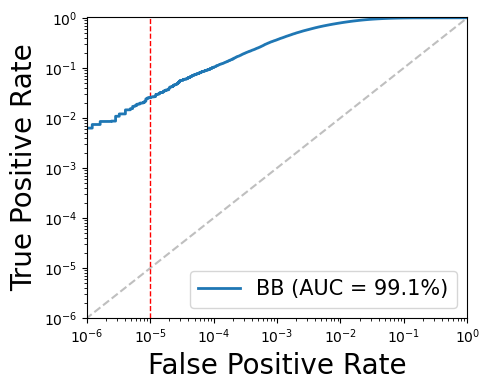

In [20]:
model3 = IsolationForest(ndim=1,ntrees=100, scoring_metric="adj_depth").fit(x_train) 
score3 = model3.predict(x_test, output="score")
score_bsm3 = model3.predict(BB, output='score')
fpr3, tpr3, auc3 = metrics.get_roc_auc(score_0=score3, score_1=score_bsm3) 
metrics.plot_roc(fpr3, tpr3, auc3)

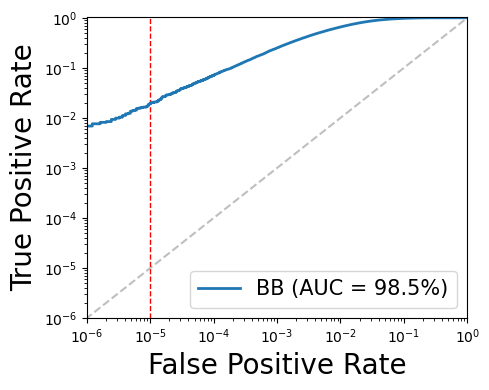

In [21]:
model4 = IsolationForest(ndim=1,ntrees=100, scoring_metric="adj_density").fit(x_train) 
score4 = model4.predict(x_test, output="score")
score_bsm4 = model4.predict(BB, output='score')
fpr4, tpr4, auc4 = metrics.get_roc_auc(score_0=score4, score_1=score_bsm4) 
metrics.plot_roc(fpr4, tpr4, auc4)

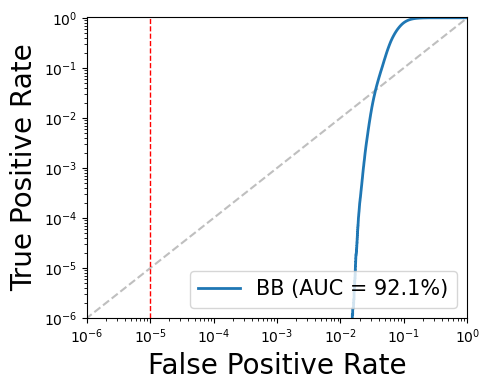

In [22]:
model5 = IsolationForest(ndim=1,ntrees=100, scoring_metric="boxed_ratio").fit(x_train) 
score5 = model4.predict(x_test, output="score")
score_bsm5 = model5.predict(BB, output='score')
fpr5, tpr5, auc5 = metrics.get_roc_auc(score_0=score5, score_1=score_bsm5) 
metrics.plot_roc(fpr5, tpr5, auc5)

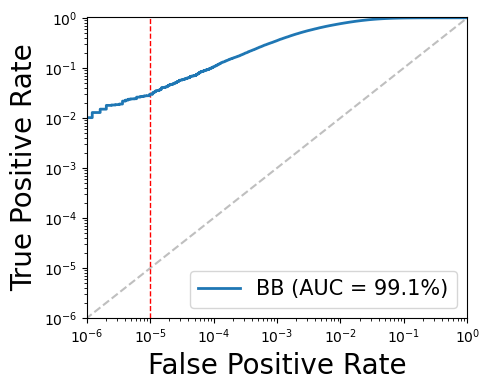

In [23]:
model6 = IsolationForest(ndim=1,ntrees=100, scoring_metric="boxed_density2").fit(x_train) 
score6 = model6.predict(x_test, output="score")
score_bsm6 = model6.predict(BB, output='score')
fpr6, tpr6, auc6 = metrics.get_roc_auc(score_0=score6, score_1=score_bsm6) 
metrics.plot_roc(fpr6, tpr6, auc6)

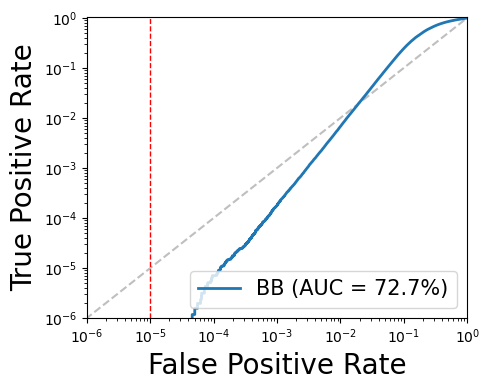

In [24]:
model7 = IsolationForest(ndim=1,ntrees=100, scoring_metric="boxed_density").fit(x_train) 
score7 = model7.predict(x_test, output="score")
score_bsm7 = model7.predict(BB, output='score')
fpr7, tpr7, auc7 = metrics.get_roc_auc(score_0=score7, score_1=score_bsm7) 
metrics.plot_roc(fpr7, tpr7, auc7)